<a href="https://colab.research.google.com/github/KseniyaSilenkova/-Final_examination_Switzerland/blob/main/read_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 17.2 MB/s 
     |████████████████████████████████| 9.8 MB 30.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
# 
import pandas as pd
import numpy as np
%matplotlib inline

# импорт SARIMAX 
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # для определения (p,q) 
from statsmodels.tsa.seasonal import seasonal_decompose      # для ETS графиков
from pmdarima import auto_arima                              # для поиска ARIMA моделей

# метрики
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('owid-covid-data.csv', index_col='date', parse_dates = True)
df

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-25,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-26,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-27,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-28,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27,ZWE,Africa,Zimbabwe,133836.0,0.0,31.571,4704.0,0.0,0.714,8867.909,0.000,2.092,311.685,0.000,0.047,1.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4152.0,1449073.0,96.015,0.275,2788.0,0.185,0.011,88.3,tests performed,6560442.0,3765392.0,2795050.0,NaN,16111.0,23490.0,43.47,24.95,18.52,NaN,1556.0,16225.0,0.108,47.22,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2021-11-28,ZWE,Africa,Zimbabwe,133951.0,115.0,43.429,4705.0,1.0,0.857,8875.529,7.620,2.878,311.751,0.066,0.057,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1044.0,1450117.0,96.084,0.069,2764.0,0.183,0.016,63.6,tests performed,6568694.0,377088

In [3]:
df.location.value_counts().index

Index(['Mexico', 'Argentina', 'Peru', 'Thailand', 'Taiwan', 'South Korea',
       'China', 'Asia', 'Japan', 'Upper middle income',
       ...
       'Tuvalu', 'Cook Islands', 'Bonaire Sint Eustatius and Saba', 'Nauru',
       'Tokelau', 'Palau', 'Saint Helena', 'Pitcairn', 'Falkland Islands',
       'Niue'],
      dtype='object', length=237)

Сбор данных по Швейцарии

In [4]:
df2 = df[df.location=='Switzerland']

In [5]:
df2

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-25,CHE,Europe,Switzerland,1.0,1.0,NaN,NaN,NaN,NaN,0.115,0.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,8715494.0,214.243,43.1,18.436,12.644,57410.166,NaN,99.739,5.59,22.6,28.9,NaN,4.53,83.78,0.955,NaN,NaN,NaN,NaN
2020-02-26,CHE,Europe,Switzerland,1.0,0.0,NaN,NaN,NaN,NaN,0.115,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,8715494.0,214.243,43.1,18.436,12.644,57410.166,NaN,99.739,5.59,22.6,28.9,NaN,4.53,83.78,0.955,NaN,NaN,NaN,NaN
2020-02-27,CHE,Europe,Switzerland,8.0,7.0,NaN,NaN,NaN,NaN,0.918,0.803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,8715494.0,214.243,43.1,18.436,12.644,57410.166,NaN,99.739,5.59,22.6,28.9,NaN,4.53,83.78,0.955,NaN,NaN,NaN,NaN
2020-02-28,CHE,Europe,Switzerland,8.0,0.0,NaN,NaN,NaN,NaN,0.918,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,8715494.0,214.243,43.1,18.436,12.644,57410.166,NaN,99.739,5.59,22.6,28.9,NaN,4.53,83.78,0.955,NaN,NaN,NaN,NaN
2020-02-29,CHE,Europe,Switzerland,18.0,10.0,NaN,NaN,NaN,NaN,2.065,1.147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,8715494.0,214.243,43.1,18.436,12.644,57410.166,NaN,99.739,5.59,22.6,28.9,NaN,4.53,83.78,0.955,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27,CHE,Europe,Switzerland,986834.0,0.0,6516.571,11470.0,0.0,12.571,113227.546,0.000,747.700,1316.047,0.000,1.442,1.47,212.0,24.324,1183.0,135.735,NaN,NaN,NaN,NaN,38447.0,12344102.0,1416.340,4.411,49572.0,5.688,0.160,6.2,tests performed,11805235.0,5839459.0,5695695.0,439919.0,22193.0,39562.0,135.45,67.00,65.35,5.05,4539.0,3241.0,0.037,NaN,8715494.0,214.243,43.1,18.436,12.644,57410.166,NaN,99.739,5.59,22.6,28.9,NaN,4.53,83.78,0.955,NaN,NaN,NaN,NaN
2021-11-28,CHE,Europe,Switzerland,986834.0,0.0,6516.571,11471.0,1.0,12.714,113227.546,0.000,747.700,1316.162,0.115,1.459,1.47,217.0,24.898,1248.0,143.193,NaN,NaN,521.0,59.779,1

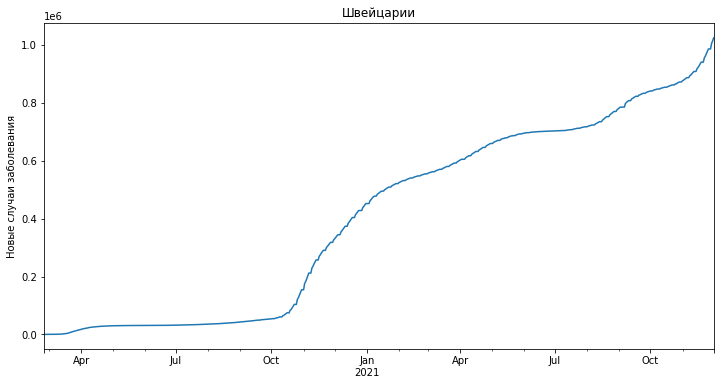

In [6]:
title = 'Швейцарии'
ylabel= 'Новые случаи заболевания'
xlabel=''

ax = df2.total_cases.plot(figsize=(12,6), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [7]:
df2.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,6.460000e+02,646.000000,641.000000,636.000000,636.000000,641.000000,646.000000,646.000000,641.000000,636.000000,636.000000,641.000000,633.000000,612.000000,612.000000,612.000000,612.000000,0.0,0.0,92.000000,92.000000,556.000000,5.560000e+02,556.000000,556.000000,549.000000,549.000000,556.000000,556.000000,3.460000e+02,3.460000e+02,3.460000e+02,319.000000,345.000000,345.000000,346.000000,346.000000,346.000000,319.000000,345.000000,345.000000,345.000000,641.000000,646.0,6.460000e+02,6.460000e+02,6.460000e+02,6.460000e+02,6.460000e+02,0.0,6.460000e+02,6.460000e+02,6.460000e+02,6.460000e+02,0.0,6.460000e+02,6.460000e+02,6.460000e+02,90.000000,90.000000,90.000000,90.000000
mean,4.074950e+05,1586.886997,1556.785599,6637.540881,18.157233,17.926454,46755.234509,182.076557,178.622743,761.579388,2.083310,2.056844,1.141327,176.598039,20.262544,868.877451,99.693415,NaN,NaN,385.739130,44.259022,22308.654676,5.006879e+06,574.480252,2.559640,22340.566485,2.563313,0.073791,34.963849,5.706282e+06,3.114346e+06,2.628841e+06,17322.633229,34735.115942,34324.315942,65.472572,35.733382,30.162543,0.198339,3938.321739,16933.304348,0.194281,50.590998,8715494.0,2.142430e+02,4.310000e+01,1.843600e+01,1.264400e+01,5.741017e+04,NaN,9.973900e+01,5.590000e+00,2.260000e+01,2.890000e+01,NaN,4.530000e+00,8.378000e+01,9.550000e-01,4919.117778,5.428667,8.168222,564.410667
std,3.283870e+05,2680.431208,1748.583582,4298.435337,28.835080,27.610243,37678.534689,307.547837,200.629314,493.194707,3.308493,3.167959,0.400250,146.225378,16.777637,903.212950,103.633017,NaN,NaN,413.275761,47.418519,12628.923942,3.807503e+06,436.866017,1.449001,9822.079535,1.126973,0.062583,45.484764,4.271381e+06,2.172470e+06,2.158348e+06,78555.389766,29452.075161,24271.302008,49.009041,24.926497,24.764724,0.901193,2784.849174,14074.551003,0.161516,11.447008,0.0,7.679808e-13,4.479888e-13,1.777733e-13,6.044293e-14,4.878669e-10,NaN,9.670869e-13,4.266560e-14,2.417717e-13,4.622107e-14,NaN,4.266560e-14,7.253152e-13,2.555492e-15,3930.720530,4.760613,20.156111,451.003756
min,1.000000e+00,0.000000,3.857000,1.000000,-87.000000,-0.143000,0.115000,0.000000,0.443000,0.115000,-9.982000,-0.016000,0.480000,11.000000,1.262000,58.000000,6.655000,NaN,NaN,5.000000,0.574000,1529.000000,2.512000e+03,0.288000,0.175000,3256.000000,0.374000,0.004000,3.700000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,8.330000,8715494.0,2.142430e+02,4.310000e+01,1.843600e+01,1.264400e+01,5.741017e+04,NaN,9.973900e+01,5.590000e+00,2.260000e+01,2.890000e+01,NaN,4.530000e+00,8.378000e+01,9.550000e-01,-1192.800000,-8.

In [8]:
df2.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vac

In [9]:
df3 = df2[['new_cases',
          'total_deaths', 'new_deaths',
          'total_cases_per_million',
          'new_cases_per_million', 
          'total_deaths_per_million', 'new_deaths_per_million']] 

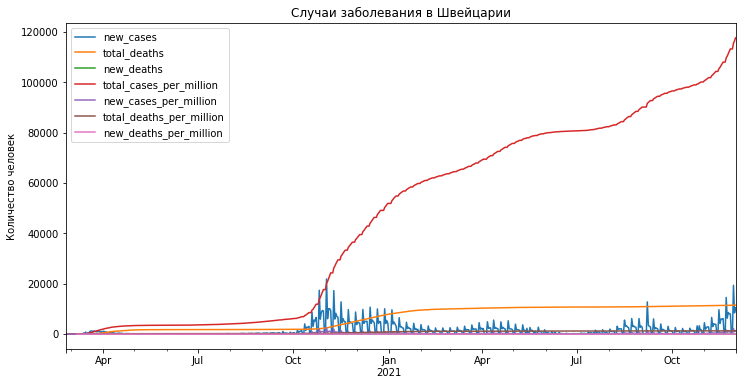

In [10]:
title = 'Случаи заболевания в Швейцарии'
ylabel= 'Количество человек'
xlabel=''

ax1 = df3.plot(figsize=(12,6), title=title)
ax1.autoscale(axis='x', tight=True)
ax1.set(xlabel=xlabel, ylabel=ylabel);


Важна ли сезонность при появлении новых заболевших?

In [11]:
df4 = df3[['new_cases']]

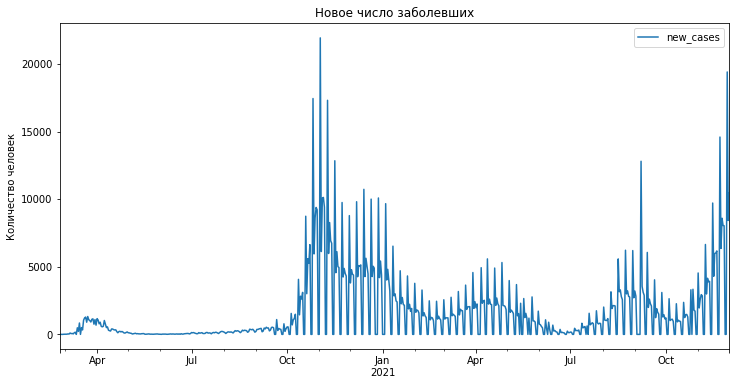

In [12]:
title = 'Новое число заболевших'
ylabel= 'Количество человек'
xlabel=''

ax2 = df4.plot(figsize=(12,6), title=title)
ax2.autoscale(axis='x', tight=True)
ax2.set(xlabel=xlabel, ylabel=ylabel);

Пики новых волн заболеваемости не имеют сезонности, т.к. отсутствует периодичность.

In [13]:
df5 = df3[['total_cases_per_million']]

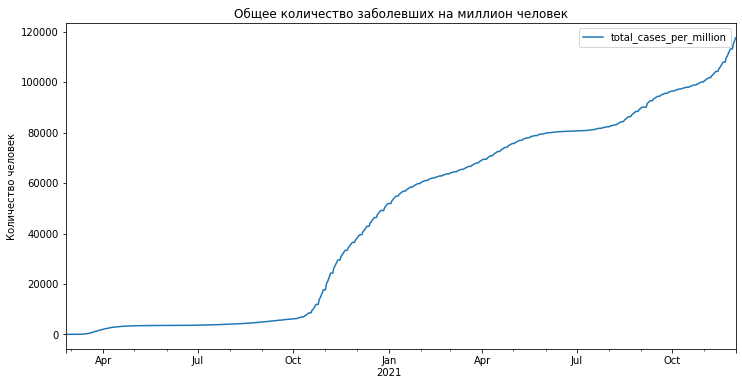

In [14]:
title = 'Общее количество заболевших на миллион человек'
ylabel= 'Количество человек'
xlabel=''

ax3 = df5.plot(figsize=(12,6), title=title)
ax3.autoscale(axis='x', tight=True)
ax3.set(xlabel=xlabel, ylabel=ylabel);

Тренд: Общее количество заболевших всегда будет расти, пока будут новые заболевшие

Гипотеза: Какое будет общее количество случаев заболевания на миллион в период с 5 апреля 2021 года по 5 ноября 2021 года

Сбор информации по общему количеству заболевших на миллион человек с начала пандемии по 5 апреля 2021 года

In [15]:
df6 = df5[:'2021-04-05']

In [16]:
df6

,total_cases_per_million
date,
2020-02-25,0.115
2020-02-26,0.115
2020-02-27,0.918
2020-02-28,0.918
2020-02-29,2.065
...,...
2021-04-01,69197.684
2021-04-02,69455.845
2021-04-03,69455.845


Графическое представление данных

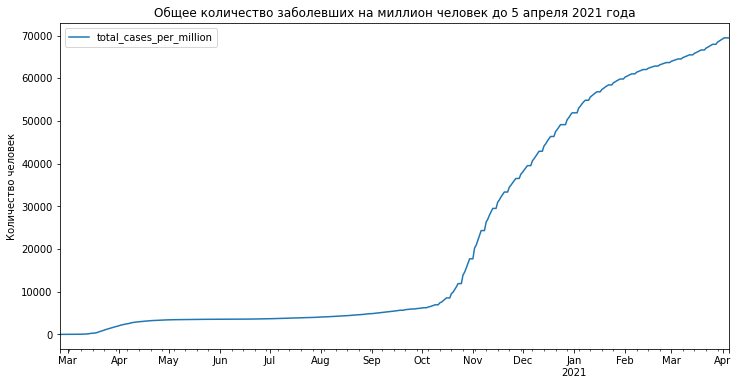

In [17]:
title = 'Общее количество заболевших на миллион человек до 5 апреля 2021 года'
ylabel= 'Количество человек'
xlabel=''

ax3 = df6.plot(figsize=(12,6), title=title)
ax3.autoscale(axis='x', tight=True)
ax3.set(xlabel=xlabel, ylabel=ylabel);

ETS декомпозиция

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:
r = seasonal_decompose(df6['total_cases_per_million'], model='additive')

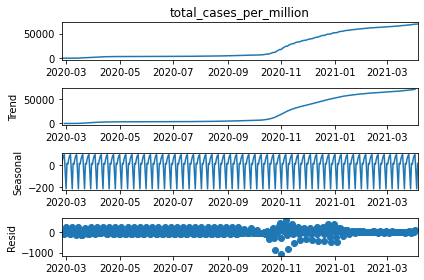

In [20]:
r.plot();

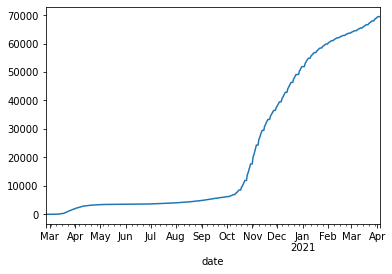

In [21]:
r.observed.plot()

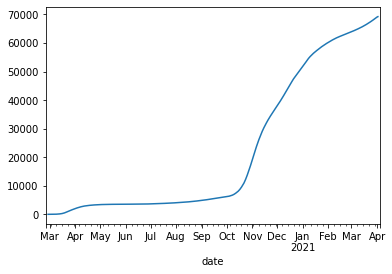

In [22]:
r.trend.plot()

Тренд: Наблюдается общая тенденция к росту заболеваемости

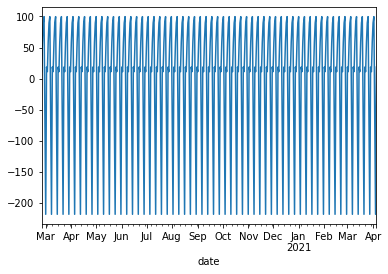

In [23]:
r.seasonal.plot()

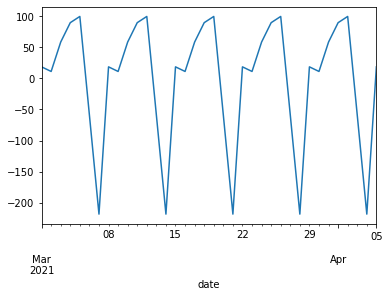

In [24]:
r.seasonal['2021-03-01':'2021-04-30'].plot();

Наблюдается определенная недельная сезонность в масштабе +-150 человек

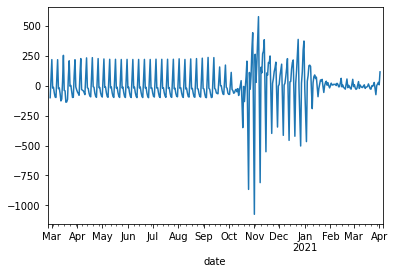

In [25]:
r.resid.plot()

Остатки (+-750 человек) превышают сезонность. Сезонность меньше, чем случайные колебания. Период с сентября 2020 по апрель 2021 является случайным

#Выбор и настройка модели ARIMA

In [26]:
auto_arima(df6['total_cases_per_million'],seasonal=True,d=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  406
Model:               SARIMAX(3, 7, 0)   Log Likelihood               -3654.594
Date:                Tue, 21 Dec 2021   AIC                           7317.188
Time:                        10:04:41   BIC                           7333.143
Sample:                             0   HQIC                          7323.507
                                - 406                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7851      0.022    -80.694      0.000      -1.828      -1.742
ar.L2         -1.4172      0.034    -41.545      0.000      -1.484      -1.350
ar.L3         -0.4822      0.023    -20.527      0.000      -0.528      -0.436
sigma2      5.326e+06   1.57e+05     33.987      0.000    5.02e+06    5.63e+06
===================================================================================
Ljung-Box (L1) (Q):                  87.67   Jarque-Bera (JB):              2894.11
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             482.32   Skew:                             0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Прогнозируем на месяц

In [27]:
train = df6[:'2021-03-05']
test = df6['2021-03-06':]

In [28]:
train

,total_cases_per_million
date,
2020-02-25,0.115
2020-02-26,0.115
2020-02-27,0.918
2020-02-28,0.918
2020-02-29,2.065
...,...
2021-03-01,63965.623
2021-03-02,64095.277
2021-03-03,64235.602


In [29]:
test

,total_cases_per_million
date,
2021-03-06,64516.136
2021-03-07,64516.136
2021-03-08,64830.978
2021-03-09,64989.087
2021-03-10,65160.162
2021-03-11,65321.828
2021-03-12,65474.774
2021-03-13,65474.774
2021-03-14,65474.774


Обучаем модель SARIMA (3, 7, 0)(1, 1, 0, 7)

In [30]:
model = SARIMAX(train['total_cases_per_million'], order = (3, 7, 0), seasonal_order=(1, 1, 0, 7))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:           total_cases_per_million   No. Observations:                  375
Model:             SARIMAX(3, 7, 0)x(1, 1, 0, 7)   Log Likelihood               -2847.950
Date:                           Tue, 21 Dec 2021   AIC                           5705.900
Time:                                   10:04:47   BIC                           5725.344
Sample:                               02-25-2020   HQIC                          5713.630
                                    - 03-05-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9218      0.017   -110.934      0.000      -1.956      -1.888
ar.L2         -1.6750      0.028    -60.078      0.000      -1.730      -1.620
ar.L3         -0.6848      0.018    -38.433      0.000      -0.720      -0.650
ar.S.L7        0.5681      0.017     33.411      0.000       0.535       0.601
sigma2      4.154e+05   1.13e+04     36.921      0.000    3.93e+05    4.37e+05
===================================================================================
Ljung-Box (L1) (Q):                  81.27   Jarque-Bera (JB):              3509.37
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              29.19   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Прогноз на месяц

In [31]:
predictions = results.predict(start='2021-03-06', end='2021-04-05', dynamic=False, typ='levels').rename(' SARIMAX(3, 7, 0)x(1, 1, [0], 7) Predictions')

In [32]:
#Сравним результаты
for i in range(len(predictions)):
  print(f"predicted={predictions[i]:<11.10}, expected={test['total_cases_per_million'][i]}")

predicted=64562.41372, expected=64516.136
predicted=64602.21828, expected=64516.136
predicted=64822.35874, expected=64830.977999999996
predicted=64544.53462, expected=64989.087
predicted=63585.12121, expected=65160.162000000004
predicted=61364.01811, expected=65321.828
predicted=57050.30298, expected=65474.774000000005
predicted=49372.38298, expected=65474.774000000005
predicted=36802.40652, expected=65474.774000000005
predicted=17374.60007, expected=65838.494
predicted=-12400.74031, expected=66003.488
predicted=-56294.40238, expected=66216.671
predicted=-119379.95 , expected=66417.463
predicted=-208057.6544, expected=66618.025
predicted=-330394.5551, expected=66618.025
predicted=-496131.722, expected=66618.025
predicted=-717059.2845, expected=67036.017
predicted=-1008317.582, expected=67247.594
predicted=-1387368.59, expected=67479.594
predicted=-1875263.289, expected=67714.349
predicted=-2496918.94, expected=67949.906
predicted=-3281728.873, expected=67949.906
predicted=-4263858.84, 

Из сравнения результатов видно, что модель более-менее может предсказать на 6 дней, далее предсказания с ожидаемыми данными расходятся.

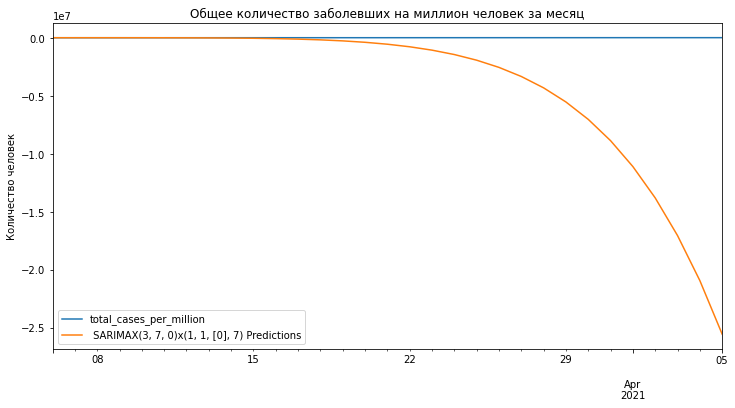

In [33]:
title = 'Общее количество заболевших на миллион человек за месяц'
ylabel= 'Количество человек'
xlabel=''

ax5 = test['total_cases_per_million'].plot(legend=True,figsize=(12,6), title=title)
predictions.plot(legend=True)
ax5.autoscale(axis='x', tight=True)
ax5.set(xlabel=xlabel, ylabel=ylabel);

Проблема: в прогнозе на месяц прогнозируется падение, когда наша переменная падать не может (она может только расти).

Оценка качество модели с помощью MSE и RMSE

In [34]:
error1 = mean_squared_error(test['total_cases_per_million'], predictions)
error2 = rmse(test['total_cases_per_million'], predictions)
print(f'SARIMAX(3, 7, 0)x(1, 1, [0], 7) MSE Error: {error1:11.10}')
print(f'SARIMAX(3, 7, 0)x(1, 1, [0], 7) RMSE Error: {error2:11.10}')

SARIMAX(3, 7, 0)x(1, 1, [0], 7) MSE Error: 6.152118632e+13
SARIMAX(3, 7, 0)x(1, 1, [0], 7) RMSE Error: 7843544.245


Ошибка слишком большая

Обучение модели на полном датасете и предсказание на месяц вперед

In [35]:
model = SARIMAX(df6['total_cases_per_million'],order=(3, 7, 0),seasonal_order=(1, 1, 0, 7))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:           total_cases_per_million   No. Observations:                  406
Model:             SARIMAX(3, 7, 0)x(1, 1, 0, 7)   Log Likelihood               -3077.539
Date:                           Tue, 21 Dec 2021   AIC                           6165.079
Time:                                   10:04:53   BIC                           6184.935
Sample:                               02-25-2020   HQIC                          6172.948
                                    - 04-05-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9232      0.016   -119.844      0.000      -1.955      -1.892
ar.L2         -1.6767      0.026    -64.960      0.000      -1.727      -1.626
ar.L3         -0.6864      0.016    -41.710      0.000      -0.719      -0.654
ar.S.L7        0.5696      0.016     36.155      0.000       0.539       0.600
sigma2      3.849e+05   9641.564     39.923      0.000    3.66e+05    4.04e+05
===================================================================================
Ljung-Box (L1) (Q):                  88.01   Jarque-Bera (JB):              4500.15
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              12.85   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
fcast = results.predict(len(df6)-1,len(df6)+30,typ='levels').rename(' SARIMAX(3, 7, 0)x(1, 1, [0], 7) Forecast')

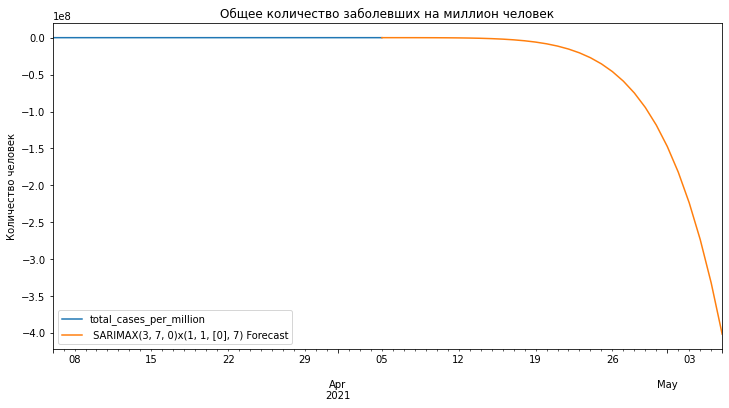

In [37]:
title = 'Общее количество заболевших на миллион человек'
ylabel= 'Количество человек'
xlabel=''

ax = test['total_cases_per_million'].plot(legend=True,figsize=(12,6), title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

Проблема: в прогнозе на месяц прогнозируется падение, когда наша переменная падать не может (она может только расти).

#Модель простейшего экспоненциального сглаживания

In [39]:
# первая модель экспоненциального сглаживания
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

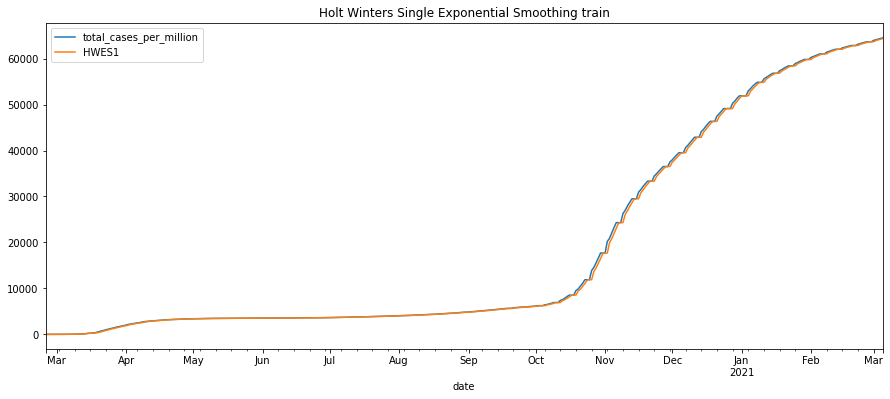

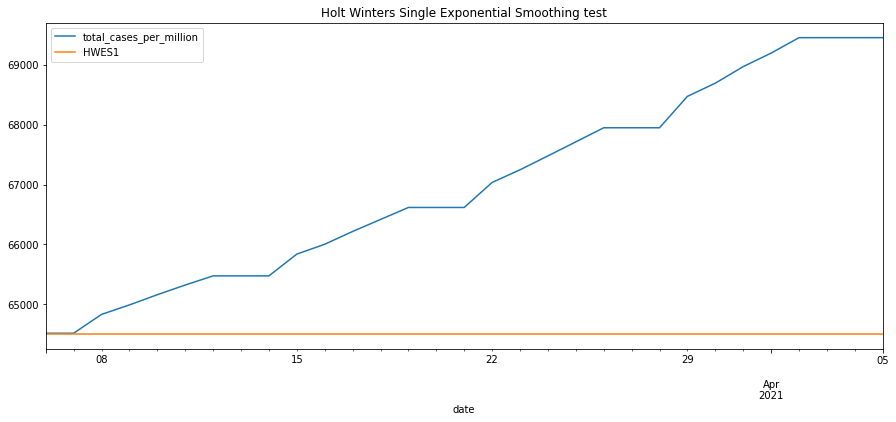

In [51]:
start=len(train)
end=len(train)+len(test)-1
HWE1 = SimpleExpSmoothing (train['total_cases_per_million']).fit(smoothing_level=0.9, optimized=False, use_brute=True)
train['HWES1'] = HWE1.fittedvalues
train[['total_cases_per_million', 'HWES1']].plot(title='Holt Winters Single Exponential Smoothing train', figsize=(15,6));
test['HWES1'] = HWE1.predict(start, end)
test[['total_cases_per_million', 'HWES1']].plot(title='Holt Winters Single Exponential Smoothing test', figsize=(15,6));

Модель HWE1 предсказывает постоянное значение на весь период

In [52]:
HWE1.params_formatted

,name,param,optimized
smoothing_level,alpha,0.900,False
initial_level,l.0,0.115,False


Проблема: Простейшее экспоненциальное сглаживание не видит сезонности. Это не лучшее предсказание, т.к. на весь период предсказано одно количество заболевших, когда наша переменная может только расти

#Модель Holt

In [53]:
# вторая и третья модель экспоненциального сглаживания
from statsmodels.tsa.holtwinters import ExponentialSmoothing

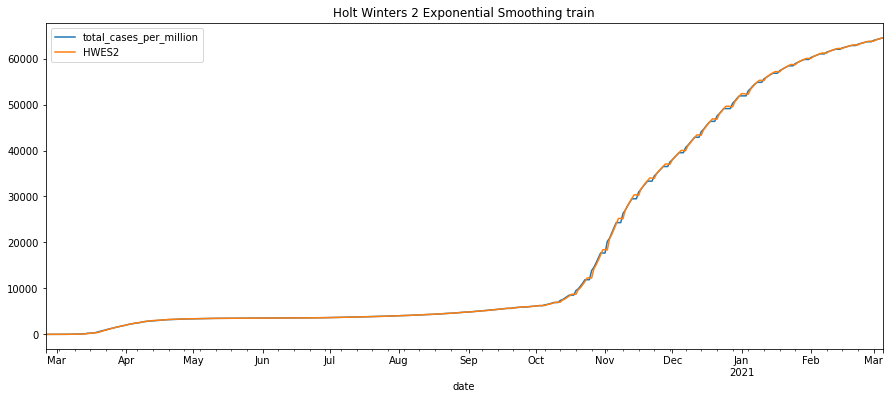

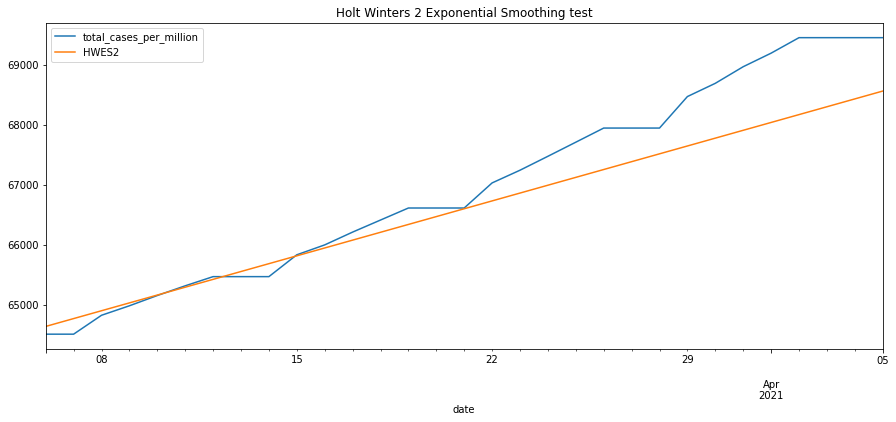

In [54]:
HWE2 = ExponentialSmoothing (train['total_cases_per_million'], trend='add').fit()
train['HWES2'] = HWE2.fittedvalues
train[['total_cases_per_million', 'HWES2']].plot(title='Holt Winters 2 Exponential Smoothing train', figsize=(15,6));
test['HWES2'] = HWE2.predict(start, end)
test[['total_cases_per_million', 'HWES2']].plot(title='Holt Winters 2 Exponential Smoothing test', figsize=(15,6));

Проблема: Сезонность отсутсвует. Модель обучилась и предсказала, что будет линейный рост, но это не подходит к нашей переменной.

#Модель HoltWinters
##учитывает сезонность, включает в себя модель Holt и экспоненциального скользящего среднего

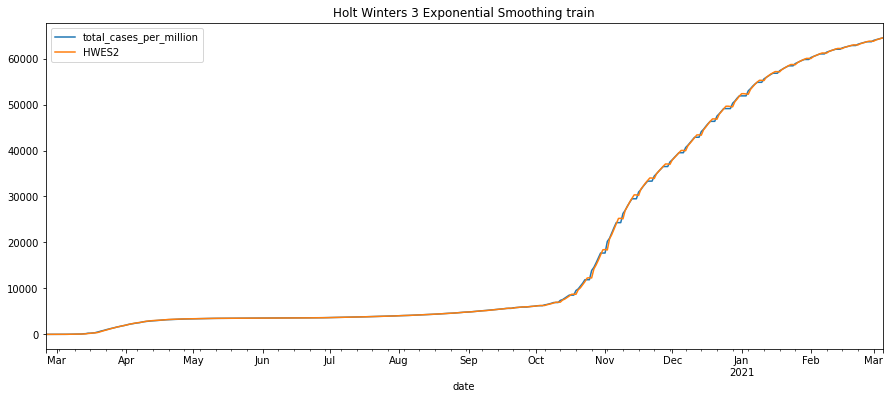

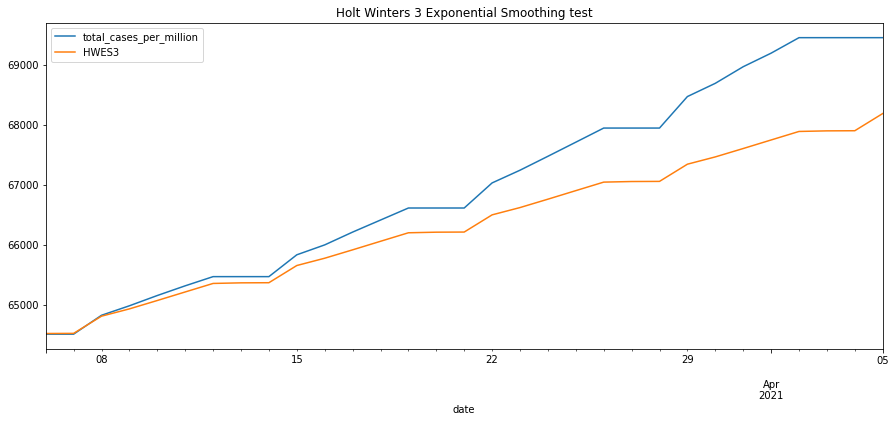

In [55]:
HWE3 = ExponentialSmoothing (train['total_cases_per_million'], trend='add', seasonal='add', seasonal_periods=7).fit()
train['HWES3'] = HWE3.fittedvalues
train[['total_cases_per_million', 'HWES2']].plot(title='Holt Winters 3 Exponential Smoothing train', figsize=(15,6));
test['HWES3'] = HWE3.predict(start, end)
test[['total_cases_per_million', 'HWES3']].plot(title='Holt Winters 3 Exponential Smoothing test', figsize=(15,6));

Модель более точно повторяет реальный рост заболеваемости. Она наиболее точная.

In [57]:
test['SARIMAX'] = predictions

In [60]:
test

,total_cases_per_million,HWES1,HWES2,HWES3,SARIMAX
date,,,,,
2021-03-06,64516.136,64500.555531,64645.130316,64527.307018,6.456241e+04
2021-03-07,64516.136,64500.555531,64775.830509,64529.475412,6.460222e+04
2021-03-08,64830.978,64500.555531,64906.530702,64815.906926,6.482236e+04
2021-03-09,64989.087,64500.555531,65037.230895,64937.435665,6.454453e+04
2021-03-10,65160.162,64500.555531,65167.931088,65077.060583,6.358512e+04
2021-03-11,65321.828,64500.555531,65298.631281,65219.464546,6.136402e+04
2021-03-12,65474.774,64500.555531,65429.331474,65361.359962,5.705030e+04
2021-03-13,65474.774,64500.555531,65560.031667,65371.290400,4.937238e+04
2021-03-14,65474.774,64500.555531,65690.731860,65373.458794,3.680241e+04


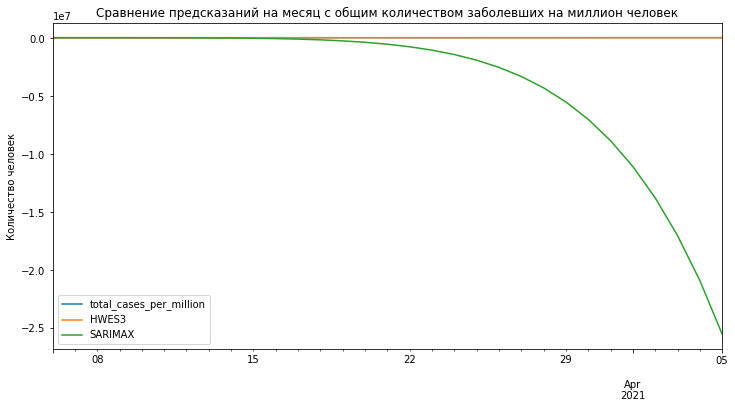

In [61]:
title = 'Сравнение предсказаний на месяц с общим количеством заболевших на миллион человек'
ylabel= 'Количество человек'
xlabel=''

ax = test[['total_cases_per_million', 'HWES3', 'SARIMAX']].plot(legend=True,figsize=(12,6), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

Оценка качество модели с помощью MSE и RMSE

In [56]:
error1 = mean_squared_error(test['total_cases_per_million'], test['HWES3'])
error2 = rmse(test['total_cases_per_million'], test['HWES3'])
print(f'HWES3 MSE Error: {error1:11.10}')
print(f'HWES3 RMSE Error: {error2:11.10}')

HWES3 MSE Error: 665874.3156
HWES3 RMSE Error: 816.0112227


Модель HoltWinters дала ошибку rmse меньше, чем модель ARIMA